#📌 Extracción

In [2]:
import json
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

url_json = 'https://raw.githubusercontent.com/DnRiv/Challenge-Alura-Telecom/main/TelecomX_Data.json'

In [3]:
# Importa los datos
response = requests.get(url_json)
data = response.json()

df_datos = pd.DataFrame(data)

In [4]:
df_datos.shape

(7267, 6)

In [5]:
df_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#🔧 Transformación

In [6]:
# Aplana el df
df_plano = pd.concat([
    df_datos.drop(['customer', 'phone', 'internet', 'account'], axis=1),
    pd.json_normalize(df_datos['customer']),
    pd.json_normalize(df_datos['phone']),
    pd.json_normalize(df_datos['internet']),
    pd.json_normalize(df_datos['account'])
], axis=1)

In [7]:
df_plano.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [8]:
# Revisa las Columnas
print(df_plano.columns)


Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')


In [9]:
df_plano.sample(30)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
4991,6828-HMKWP,No,Male,0,Yes,Yes,12,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),21.05,262.05
5982,8178-EYZUO,Yes,Male,0,No,No,46,Yes,Yes,Fiber optic,...,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check,93.70,4154.8
4532,6211-WWLTF,No,Male,0,Yes,No,63,Yes,No,Fiber optic,...,No,Yes,No,Yes,Yes,Two year,No,Credit card (automatic),99.70,6330.4
1843,2623-DRYAM,No,Female,0,Yes,No,70,Yes,Yes,Fiber optic,...,No,Yes,No,Yes,Yes,One year,Yes,Electronic check,101.75,7069.3
1451,2080-SRCDE,No,Female,0,No,Yes,1,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,25.40,25.4
5041,6894-LFHLY,Yes,Male,1,No,No,1,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75
1088,1543-LLLFT,No,Male,1,Yes,No,61,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,No,One year,Yes,Mailed check,98.30,6066.55
7254,9972-VAFJJ,No,Female,1,Yes,No,53,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,No,One year,Yes,Electronic check,94.00,4871.45
6050,8259-NFJTV,No,Female,0,Yes,Yes,7,No,No phone service,DSL,...,No,No,Yes,No,No,Month-to-month,No,Mailed check,34.65,246.6
6164,8439-LTUGF,No,Male,0,No,No,10,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),20.00,198.6


In [10]:
# Revisa los tipos de datos
df_plano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [11]:
# Renombra las columnas
df_plano.rename(columns={
    'customerID': 'CustomerID',
    'Churn': 'Churn',
    'gender': 'Gender',
    'tenure': 'Tenure',
    'Charges.Monthly': 'ChargesMonthly',
    'Charges.Total': 'ChargesTotal',
}, inplace=True)


In [12]:
# Cambia tipo de datos ChargesTotal
df_plano['ChargesTotal'] = pd.to_numeric(df_plano['ChargesTotal'], errors='coerce')

In [13]:
# Conteo de valores nulos por columna
print(df_plano.isnull().sum())

CustomerID           0
Churn                0
Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
ChargesMonthly       0
ChargesTotal        11
dtype: int64


In [14]:
# Almacenar nulls de ChargesTotal
df_nulos_total = df_plano[df_plano['ChargesTotal'].isnull()]
df_nulos_total.shape

(11, 21)

In [15]:
# Revisa nulls en ChargesTotal
df_nulos_total

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


In [16]:
# Rellena vacios en ChargesTotal
mask = (df_plano['Tenure'] == 0) & (df_plano['ChargesTotal'].isna())
df_plano.loc[mask, 'ChargesTotal'] = df_plano.loc[mask, 'ChargesMonthly']


In [17]:
# Comprueba los vacíos en la columna ChargesTotal
print(df_plano.isnull().sum())

CustomerID          0
Churn               0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
ChargesMonthly      0
ChargesTotal        0
dtype: int64


In [18]:
# Conteo de valores vacíos
print((df_plano == '').sum())

CustomerID            0
Churn               224
Gender                0
SeniorCitizen         0
Partner               0
Dependents            0
Tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
ChargesMonthly        0
ChargesTotal          0
dtype: int64


In [19]:
# Reepmlaza "" por nan
df_plano['Churn'] = df_plano['Churn'].replace('', np.nan)

In [20]:
# Elimina nan de Churn
df_plano.dropna(subset=['Churn'], inplace=True)

In [21]:
# Comprueba los valores vacíos
print((df_plano == '').sum())

CustomerID          0
Churn               0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
ChargesMonthly      0
ChargesTotal        0
dtype: int64


In [22]:
# Verifica filas duplicadas
print(df_plano.duplicated().sum())

0


In [23]:
# Muestra filas duplicadas
df_plano[df_plano.duplicated()]

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal


In [24]:
# Filas con valores nulos
df_plano[df_plano.isnull().any(axis=1)]

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal


In [25]:
# Comprueba tipo de dato ChargesMonthly
print(df_plano['ChargesMonthly'].dtype)

float64


In [26]:
# Crea Columna ChargesDaily
df_plano['ChargesDaily'] = (df_plano['ChargesMonthly'] / 30).round(2)

In [27]:
df_plano.head()

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal,ChargesDaily
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


In [28]:
# Ordena las columnas
cols = list(df_plano.columns)
for col in ['ChargesDaily', 'ChargesMonthly', 'ChargesTotal']:
    cols.remove(col)
cols += ['ChargesDaily', 'ChargesMonthly', 'ChargesTotal']

df_plano = df_plano[cols]

In [29]:
df_plano.head()

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesDaily,ChargesMonthly,ChargesTotal
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.19,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.00,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.46,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.27,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.80,83.9,267.40


In [30]:
# Revisa Columnas para transformar en binario
for col in df_plano.columns:
    valores_unicos = df_plano[col].dropna().astype(str).str.strip().str.lower().unique()
    if any(val in ['yes', 'no'] for val in valores_unicos):
        print(f"{col}: {valores_unicos}")

Churn: ['no' 'yes']
Partner: ['yes' 'no']
Dependents: ['yes' 'no']
PhoneService: ['yes' 'no']
MultipleLines: ['no' 'yes' 'no phone service']
InternetService: ['dsl' 'fiber optic' 'no']
OnlineSecurity: ['no' 'yes' 'no internet service']
OnlineBackup: ['yes' 'no' 'no internet service']
DeviceProtection: ['no' 'yes' 'no internet service']
TechSupport: ['yes' 'no' 'no internet service']
StreamingTV: ['yes' 'no' 'no internet service']
StreamingMovies: ['no' 'yes' 'no internet service']
PaperlessBilling: ['yes' 'no']


In [31]:
# Transforma Columnas Yes/No en binario
for col in df_plano.columns:
    valores_limpios = df_plano[col].dropna().astype(str).str.strip().str.lower().unique()

    if set(valores_limpios).issubset({'yes', 'no'}):
        df_plano[col] = df_plano[col].astype(str).str.strip().str.lower().map({'yes': 1, 'no': 0})
        print(f"{col} : convertida a binario")


Churn : convertida a binario
Partner : convertida a binario
Dependents : convertida a binario
PhoneService : convertida a binario
PaperlessBilling : convertida a binario


In [32]:
df_plano.head()

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesDaily,ChargesMonthly,ChargesTotal
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,2.19,65.6,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,2.00,59.9,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,2.46,73.9,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,3.27,98.0,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,2.80,83.9,267.40


#📊 Carga y análisis

In [33]:
# Análisis Descriptivo
df_plano.describe()

,Churn,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,PaperlessBilling,ChargesDaily,ChargesMonthly,ChargesTotal
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,2.158675,64.761692,2279.798992
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,1.003088,30.090047,2266.730170
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.610000,18.250000,18.800000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.180000,35.500000,398.550000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,2.340000,70.350000,1394.550000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.990000,89.850000,3786.600000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,3.960000,118.750000,8684.800000


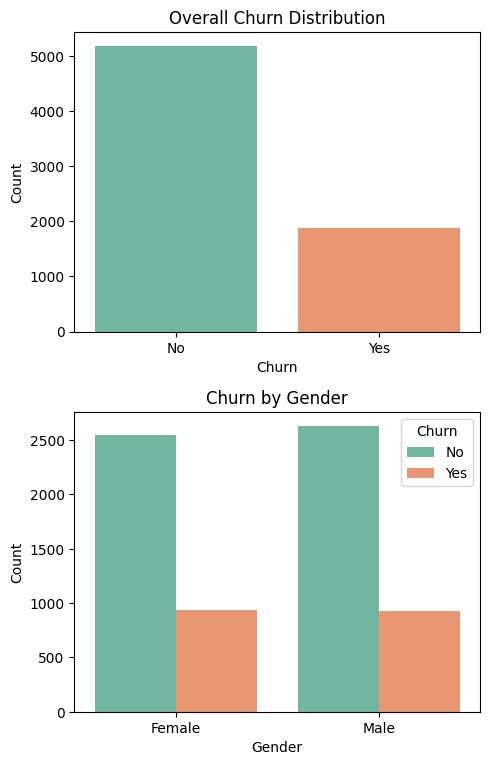

In [34]:
# Distribución del Churn

# Crea una copia del df
df_temp = df_plano.copy()
df_temp['ChurnLabel'] = df_temp['Churn'].map({0: 'No', 1: 'Yes'})

# Crea subplots
fig, axes = plt.subplots(2, 1, figsize=(5, 8))

# Plot 1
sns.countplot(data=df_temp, x='ChurnLabel', hue='ChurnLabel', palette='Set2', legend=False, ax=axes[0])
axes[0].set_title('Overall Churn Distribution')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Count')

# Plot 2
ax2 = sns.countplot(data=df_temp, x='Gender', hue='ChurnLabel', palette='Set2', ax=axes[1])
axes[1].set_title('Churn by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')
axes[1].legend(title='Churn')

plt.subplots_adjust(hspace= 100)

plt.tight_layout()
plt.show()


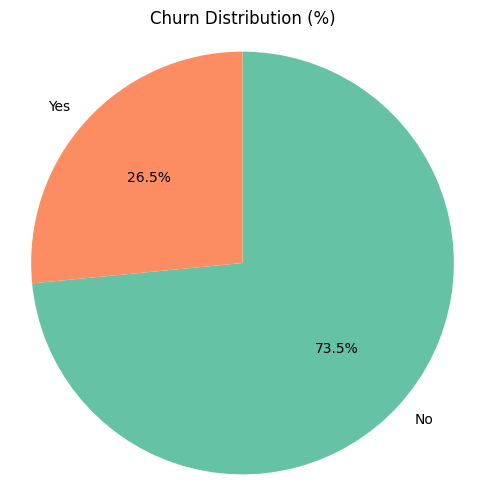

In [35]:
# Conteo de Churn
churn_counts = df_temp['ChurnLabel'].value_counts()

# Etiquetas
labels = churn_counts.index.tolist()
sizes = churn_counts.values

colors = ['#66c2a5', '#fc8d62']

# Gráfico
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Churn Distribution (%)')
plt.axis('equal')
plt.show()


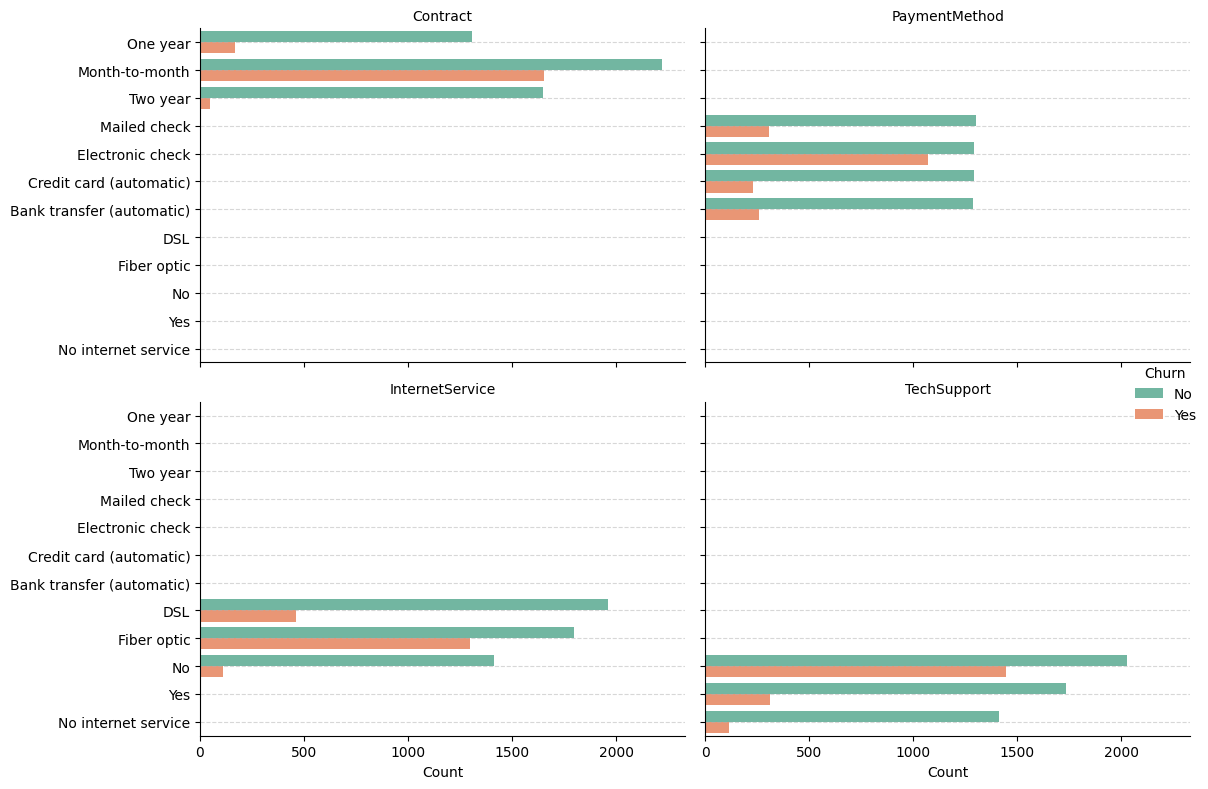

In [36]:
# Variables categóricas
categorical_vars = ['Contract', 'PaymentMethod', 'InternetService', 'TechSupport']

# Reorganiza el dataframe con melt
df_melted = df_temp.melt(
    id_vars='ChurnLabel',
    value_vars=categorical_vars,
    var_name='Category',
    value_name='Value'
)

# Crea gráfico de Barras Horizontales
g = sns.catplot(
    data=df_melted,
    y='Value', hue='ChurnLabel', col='Category',
    kind='count', col_wrap=2,
    height=4, aspect=1.4,
    palette='Set2',
    orient='h'
)

g.set_titles('{col_name}')
g.set_axis_labels('Count', '')
for ax in g.axes.flat:
    ax.tick_params(axis='y', labelrotation=0)
g._legend.set_title('Churn')

# Añadir gridline
for ax in g.axes.flat:
    ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


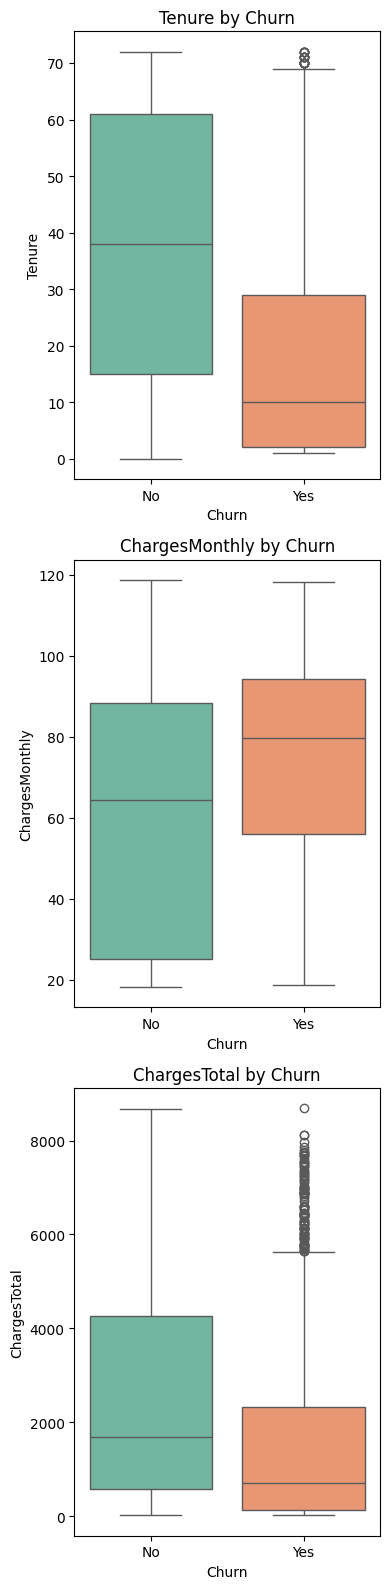

In [37]:
# Exploración de Variables Numéricas
# Copia para visualización

df_viz = df_plano.copy()
df_viz['ChurnLabel'] = df_viz['Churn'].map({1: 'Yes', 0: 'No'})

# Variables numéricas
numeric_features = ['Tenure', 'ChargesMonthly', 'ChargesTotal']

# Crea Subplots
fig, axes = plt.subplots(3, 1, figsize=(4, 16))

# Gráficos
for i, feature in enumerate(numeric_features):
    sns.boxplot(
        data=df_viz,
        x='ChurnLabel',
        y=feature,
        hue='ChurnLabel',
        palette='Set2',
        legend=False,
        ax=axes[i]
    )
    axes[i].set_title(f'{feature} by Churn')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

#📄Informe final

##Introducción
El presente análisis tiene como objetivo comprender el fenómeno de evasión de clientes (Churn) en la empresa ficticia TelecomX LATAM. La evasión representa un desafío clave para empresas de telecomunicaciones, ya que retener clientes suele ser más rentable que adquirir nuevos. Mediante la exploración de datos históricos de clientes, se busca identificar patrones y factores asociados al abandono del servicio, con el fin de proponer acciones estratégicas que reduzcan la tasa de Churn.

##Limpieza y Tratamiento de Datos
El proceso comenzó con la importación y revisión del dataset. Se aplicaron varias tareas de limpieza:

* Identificación y reemplazo de valores vacíos y nulos.

* Eliminación de registros con campos clave faltantes, como la variable objetivo Churn.

* Revisión y corrección de nombres de columnas para una nomenclatura consistente.

* Conversión de columnas categóricas binarias.

* Creación de nuevas columnas como ChargesDaily, a partir de los valores mensuales.

* Verificación y eliminación de posibles duplicados.

##Análisis Exploratorio de Datos (EDA)
Se realizaron diversos análisis para comprender mejor los patrones de Churn:

 * Distribución de Churn: Se observó que aproximadamente 26.5% de los clientes han cancelado el servicio.

 * Análisis por género, tipo de contrato y método de pago reveló ciertas tendencias asociadas al abandono.

 * Gráficos de cajas (boxplots) mostraron que clientes con menor gasto total (ChargesTotal) o menor permanencia (Tenure) tienen una mayor propensión a cancelar.

 * Se identificaron servicios específicos (como tipo de Internet o soporte técnico) que podrían influir en la decisión del cliente.

##Conclusiones
Del análisis realizado, se destacan los siguientes hallazgos clave:

* Clientes con contratos mensuales tienen mayor probabilidad de evasión en comparación con contratos de mayor plazo.

* El método de pago electrónico se asocia con mayor tasa de Churn.

* Una menor duración de contrato (Tenure) y menor gasto acumulado (ChargesTotal) son indicadores de mayor riesgo de abandono.

* Servicios como soporte técnico y copias de respaldo, cuando no están activos, también parecen correlacionarse con mayor evasión.

##Recomendaciones Estratégicas
A partir de los insights obtenidos, se proponen las siguientes acciones:

 * Programas de fidelización para clientes con contratos mensuales, incentivando la conversión a contratos más largos.

 * Revisión de métodos de pago, promoviendo alternativas más confiables o con menor tasa de abandono.

 * Mejorar soporte técnico y servicios de valor agregado, que parecen estar relacionados con la retención.

 * Campañas personalizadas para clientes nuevos o con bajo Tenure, ofreciendo beneficios durante los primeros meses.